# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


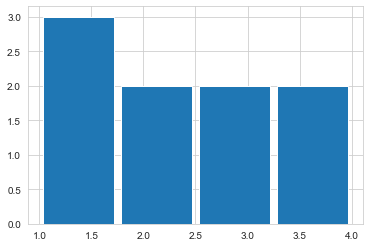

In [1]:
import math
import timeit

# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt
from random import randint
import numpy as np

array = [1, 1, 2, 3, 4, 1, 2, 3, 4]

value_counts, bins_names, visual_figure = plt.hist(array,
                                                   bins=len(set(array)),
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [7]:
from typing import List, Tuple, Union


def fast_hist(array: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    sorted_list = sorted(array)
    r = sorted_list[-1] - sorted_list[0]
    m = math.ceil(r / bins)
    end = sorted_list[0] + m
    result = [0]
    for i in sorted_list:
        if i <= end:
            result[-1] += 1
        else:
            end += m
            result.append(1)
    return result

In [8]:
def test_correct(n: int, k: int):
    lst = [randint(0, 10000) for i in range(n)]
    fig, axs = plt.subplots(2)
    fig.suptitle('Histogram difference')
    axs[0].hist(lst, k)
    axs[1].bar(list(range(k)), fast_hist(lst, k))



In [22]:
def test(n: int, k: int):
    lst = [randint(0, 10000) for i in range(n)]
    print(timeit.timeit(lambda: np.histogram(lst, k), number=1000))
    print(timeit.timeit(lambda: fast_hist(lst, k), number=1000))

In [23]:
test(10000, 37)

0.08403850000104285
0.10670670000035898


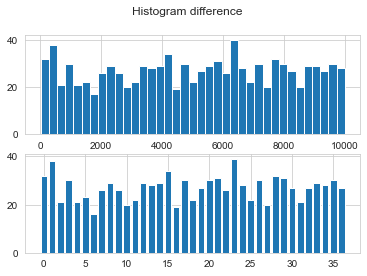

In [19]:
test_correct(1000, 37)